In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Leer  CSV

In [315]:
df = pd.read_csv(r"C:/Users/calex/OneDrive - Universidad de la Sabana/2025-2/UniSabana/Code - PCD/resultados_municipios.csv")
# Ajusta el nombre de la columna de municipio si es diferente
Municipio = "NOM_MUN"

In [316]:
df

Departamento               Municipio     DIF_min     DIF_max  \
0          CAQUETA               FLORENCIA  802.818970  958.051025   
1          CAQUETA                 ALBANIA  918.604004  928.466003   
2          CAQUETA  BELEN DE LOS ANDAQUIES  822.543030  951.841980   
3          CAQUETA             EL DONCELLO  815.603027  945.267029   
4          CAQUETA               EL PAUJIL  803.549988  936.866028   
...            ...                     ...         ...         ...   
1113  CUNDINAMARCA              FUSAGASUGA  762.642029  953.302002   
1114  CUNDINAMARCA    SAN JUAN DE RIO SECO  837.518005  963.164001   
1115        TOLIMA                   HONDA  874.408020  937.231995   
1116     ANTIOQUIA                SABANETA  906.916016  948.919983   
1117     ANTIOQUIA             LA ESTRELLA  901.072021  972.296021   

        DIF_mean    DIF_std  DIF_median      DNI_min      DNI_max  \
0     909.802163  13.177103  912.393982   413.828003  1200.577026   
1     923.025512   1.862814  922.622009  1113.646973  1166.608032   
2     915.903580  13.474749  918.968994   429.533997  1172.817993   
3     907.085480  16.761201  913.125000   456.562012  1238.562988   
4     910.789359  15.457376  916.411987   418.941986  1233.813965   
...          ...        ...         ...          ...          ...   
1113  929.391227  24.501736  937.596985   338.587006  1276.913940   
1114  932.363348  11.773004  931.752991   744.013977  1506.656006   
1115  918.366851   8.984192  920.065002  1299.193970  1554.869019   
1116  926.497757   6.118261  925.908997  1083.697021  1370.417969   
1117  933.611756  10.400316  935.039978  1033.291992  1337.180054   

         DNI_mean  ...    PVOUT_min    PVOUT_max   PVOUT_mean   PVOUT_std  \
0      909.297118  ...  1016.125977  1414.978027  1267.520987   99.337954   
1     1144.253073  ...  1381.740967  1405.116943  1395.313789    5.980074   
2      939.509435  ...  1017.952026  1407.673950  1291.264843  103.444745   
3     1044.483990  ...  1019.778015  1440.181030  1336.953101  122.206388   
4     1082.787490  ...   990.922974  1435.797974  1355.611419  119.271516   
...           ...  ...          ...          ...          ...         ...   
1113   956.507940  ...   942.344971  1460.269043  1271.111784  137.676686   
1114  1217.156418  ...  1255.729980  1600.160034  1447.188342   79.777684   
1115  1481.197458  ...  1570.939941  1638.145996  1601.534280   10.131719   
1116  1249.086872  ...  1418.265991  1519.805054  1475.610064   30.861511   
1117  1184.909186  ...  1414.248047  1507.751953  1459.705078   24.632115   

      PVOUT_median   TEMP_min   TEMP_max  TEMP_mean  TEMP_std  TEMP_median  
0      1262.303955   8.200000  25.400000  20.056479  4.179916    20.700001  
1      1395.985962  23.600000  25.100000  24.457527  0.362935    24.500000  
2      1320.014038  10.000000  25.000000  20.928040  3.178867    21.799999  
3      1413.151978   7.800000  25.600000  21.758011  4.399175    24.600000  
4      1415.343994   7.700000  25.600000  22.417579  4.670324    25.100000  
...            ...        ...        ...        ...       ...          ...  
1113   1308.691040  15.300000  28.299999  23.106609  2.403485    23.500000  
1114   1442.371948  17.700001  27.100000  23.767657  2.339392    24.400000  
1115   1601.987061  22.100000  26.400000  24.539612  0.811796    24.600000  
1116   1480.723999  16.900000  20.700001  19.300000  1.176235    19.600000  
1117   1456.616943  13.300000  20.400000  17.725001  1.938031    18.299999  

[1118 rows x 37 columns]

# 1. Distribución de radiación solar (histogramas)

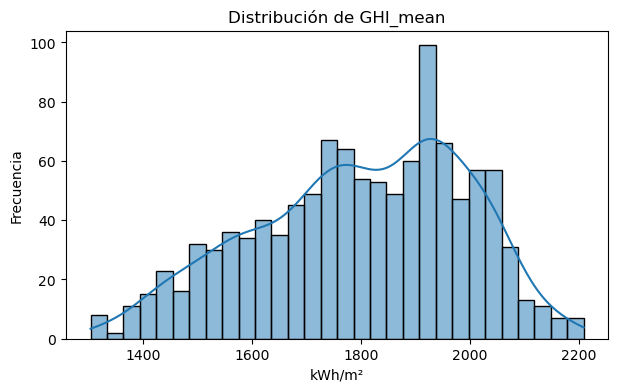

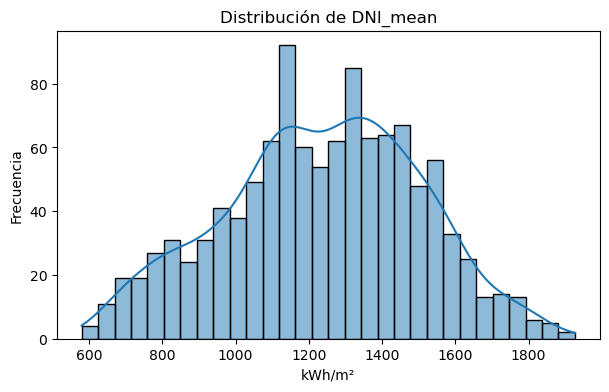

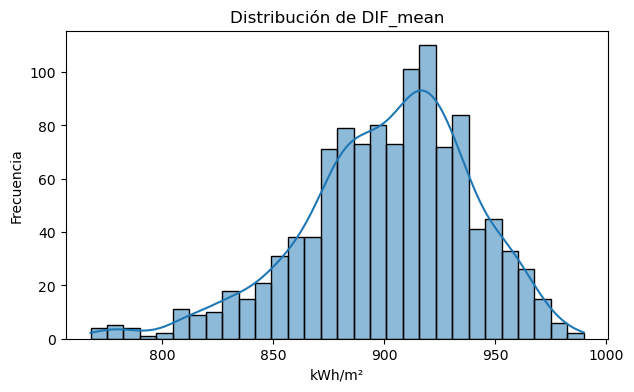

In [317]:
variables = ["GHI_mean", "DNI_mean", "DIF_mean"]

for var in variables:
    plt.figure(figsize=(7,4))
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f"Distribución de {var}")
    plt.xlabel("kWh/m²")
    plt.ylabel("Frecuencia")
    plt.show()

# 2. Comparar irradiación y producción FV (scatterplot)

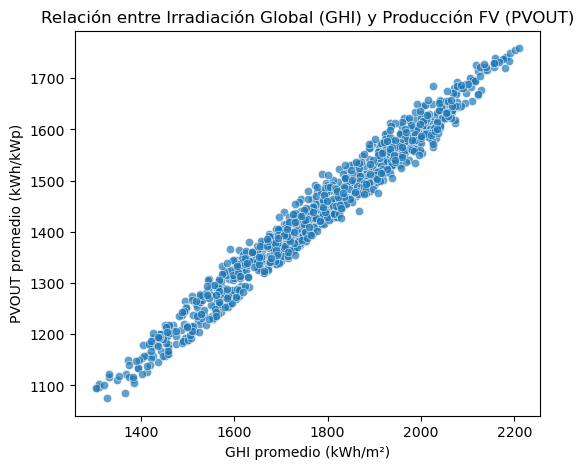

In [318]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="GHI_mean", y="PVOUT_mean", alpha=0.7)
plt.title("Relación entre Irradiación Global (GHI) y Producción FV (PVOUT)")
plt.xlabel("GHI promedio (kWh/m²)")
plt.ylabel("PVOUT promedio (kWh/kWp)")
plt.show()

# 3. Boxplots por variable (variabilidad entre municipios)


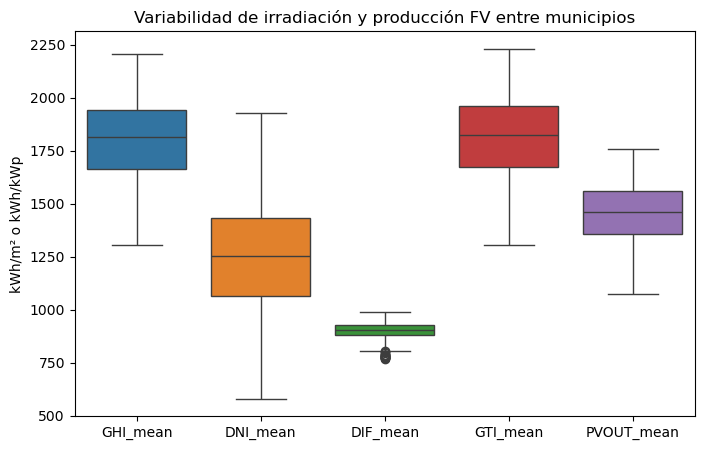

In [319]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["GHI_mean","DNI_mean","DIF_mean","GTI_mean","PVOUT_mean"]])
plt.title("Variabilidad de irradiación y producción FV entre municipios")
plt.ylabel("kWh/m² o kWh/kWp")
plt.show()


# 4. Efecto de la temperatura sobre producción FV


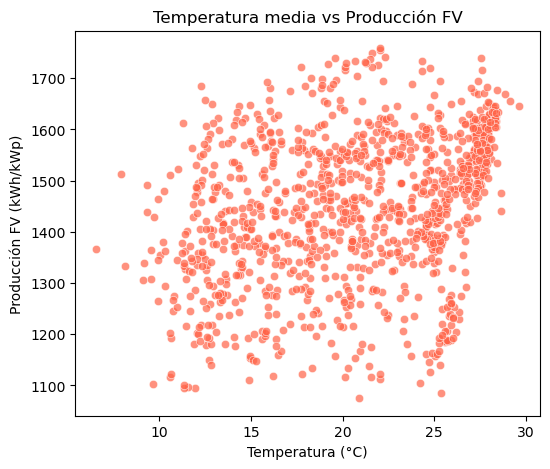

In [320]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="TEMP_mean", y="PVOUT_mean", alpha=0.7, color="tomato")
plt.title("Temperatura media vs Producción FV")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Producción FV (kWh/kWp)")
plt.show()

# 5. Municipios con mayor y menor potencial FV


In [321]:
print(df.columns)

Index(['Departamento', 'Municipio', 'DIF_min', 'DIF_max', 'DIF_mean',
       'DIF_std', 'DIF_median', 'DNI_min', 'DNI_max', 'DNI_mean', 'DNI_std',
       'DNI_median', 'GHI_min', 'GHI_max', 'GHI_mean', 'GHI_std', 'GHI_median',
       'GTI_min', 'GTI_max', 'GTI_mean', 'GTI_std', 'GTI_median', 'OPTA_min',
       'OPTA_max', 'OPTA_mean', 'OPTA_std', 'OPTA_median', 'PVOUT_min',
       'PVOUT_max', 'PVOUT_mean', 'PVOUT_std', 'PVOUT_median', 'TEMP_min',
       'TEMP_max', 'TEMP_mean', 'TEMP_std', 'TEMP_median'],
      dtype='object')


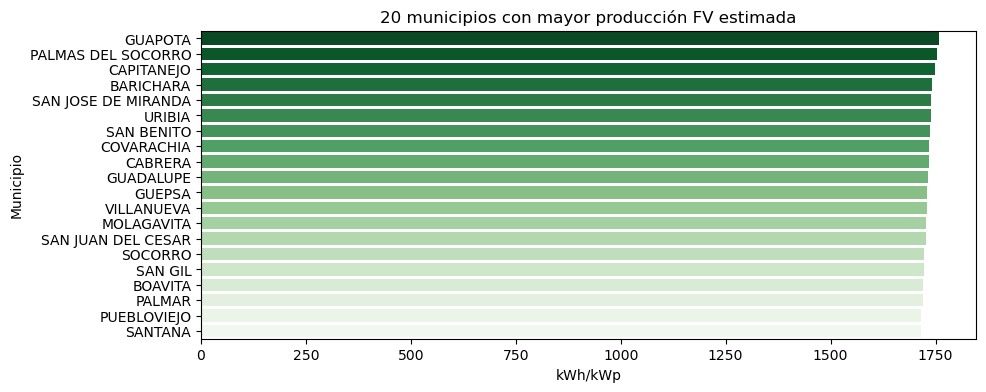

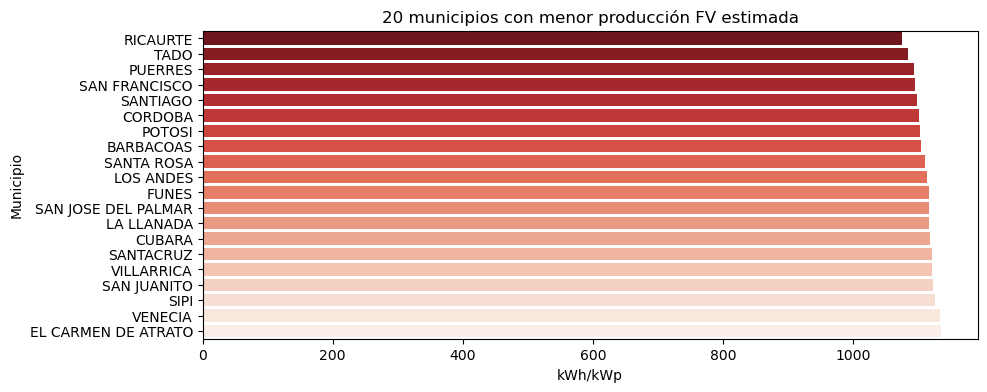

In [322]:

# Seleccionando los 20 municipios con mayor y menor producción FV estimada
top20 = df.nlargest(20, "PVOUT_mean")[["Municipio", "PVOUT_mean"]]
bottom20 = df.nsmallest(20, "PVOUT_mean")[["Municipio", "PVOUT_mean"]]

# Gráfico para los 20 municipios con mayor producción
plt.figure(figsize=(10, 4))
sns.barplot(x="PVOUT_mean", y="Municipio", data=top20, palette="Greens_r")
plt.title("20 municipios con mayor producción FV estimada")
plt.xlabel("kWh/kWp")
plt.ylabel("Municipio")
plt.show()

# Gráfico para los 20 municipios con menor producción
plt.figure(figsize=(10, 4))
sns.barplot(x="PVOUT_mean", y="Municipio", data=bottom20, palette="Reds_r")
plt.title("20 municipios con menor producción FV estimada")
plt.xlabel("kWh/kWp")
plt.ylabel("Municipio")
plt.show()


In [323]:
df = pd.read_csv("C:/Users/calex/OneDrive - Universidad de la Sabana/2025-2/UniSabana/Code - PCD/resultados_municipios_resumen.csv")
# Ajusta el nombre de la columna de municipio si es diferente
Municipio = "NOM_MUN"

In [324]:
df.columns

Index(['Departamento', 'Municipio', 'lat', 'lon', 'DIF_min', 'DIF_max',
       'DIF_mean', 'DIF_count', 'DIF_std', 'DIF_median', 'DNI_min', 'DNI_max',
       'DNI_mean', 'DNI_count', 'DNI_std', 'DNI_median', 'GHI_min', 'GHI_max',
       'GHI_mean', 'GHI_count', 'GHI_std', 'GHI_median', 'GTI_min', 'GTI_max',
       'GTI_mean', 'GTI_count', 'GTI_std', 'GTI_median', 'OPTA_min',
       'OPTA_max', 'OPTA_mean', 'OPTA_count', 'OPTA_std', 'OPTA_median',
       'PVOUT_min', 'PVOUT_max', 'PVOUT_mean', 'PVOUT_count', 'PVOUT_std',
       'PVOUT_median', 'TEMP_min', 'TEMP_max', 'TEMP_mean', 'TEMP_count',
       'TEMP_std', 'TEMP_median'],
      dtype='object')

In [325]:
# ======================
# FUNCIONES BASE 
# ======================

def detectar_outliers(data, z_thresh=2.5, iso_percentile=2):
    """
    Detecta outliers mediante tres métodos (Z-score, IQR, percentiles)
    y devuelve un diccionario con máscaras y clasificación de severidad.
    """
    if len(data) == 0:
        return None

    z_scores = np.abs(stats.zscore(data, nan_policy='omit'))
    outliers_z = z_scores > z_thresh

    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    outliers_iqr = (data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)

    lower, upper = np.percentile(data, [iso_percentile, 100 - iso_percentile])
    outliers_iso = (data < lower) | (data > upper)

    # Combinación
    out_combined = outliers_z | outliers_iqr | outliers_iso

    # Clasificación 0-3
    types = outliers_z.astype(int) + outliers_iqr.astype(int) + outliers_iso.astype(int)

    return {"z": outliers_z, "iqr": outliers_iqr, "iso": outliers_iso,
            "combined": out_combined, "types": types}


In [326]:


def graficos_variable(df, variable):
    """
    Genera análisis visual detallado para una variable (histograma, KDE, boxplot, outliers, etc.)
    """
    data = df.loc[df["Variable"] == variable, "Valor"].dropna().values

    if data.size == 0:
        print(f"⚠️ No hay datos válidos para '{variable}'")
        return

    out = detectar_outliers(data)
    if out is None:
        return

    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"Análisis Exploratorio - {variable}", fontsize=16, fontweight='bold')

    # Histograma
    sns.histplot(data, bins=50, kde=False, color="#89CFF0", ax=axs[0, 0])
    axs[0, 0].set_title("Histograma")

    # KDE
    sns.kdeplot(data, fill=True, color="#0077b6", ax=axs[0, 1])
    axs[0, 1].set_title("Distribución (KDE)")

    # Boxplot (muestra si es muy grande)
    sample = np.random.choice(data, size=min(50000, len(data)), replace=False)
    sns.boxplot(x=sample, color="#f4a261", ax=axs[0, 2])
    axs[0, 2].set_title(f"Boxplot ({len(sample)} muestras)")

    # Clasificación de outliers
    colors = ['#2E86AB', '#F6AE2D', '#E76F51', '#9B2226']
    labels = ['Normal', 'Leve', 'Moderado', 'Severo']
    axs[1, 0].set_title("Clasificación de Outliers")

    for i in range(4):
        mask = out["types"] == i
        if mask.any():
            axs[1, 0].scatter(np.where(mask)[0], data[mask], c=colors[i],
                              label=f'{labels[i]} ({mask.sum()})', s=18, alpha=0.7)
    axs[1, 0].legend(frameon=False)

    # Distribución normal vs outliers
    axs[1, 1].hist(data[~out["combined"]], bins=30, alpha=0.7, color='#2E86AB', label='Normal')
    axs[1, 1].hist(data[out["combined"]], bins=15, alpha=0.7, color='#E63946', label='Outliers')
    axs[1, 1].set_title("Normal vs Outliers")
    axs[1, 1].legend()

    # Porcentaje de outliers
    methods = ['Z-Score', 'IQR', 'Percentiles', 'Combinado']
    counts = [out[k].sum() for k in ['z', 'iqr', 'iso', 'combined']]
    percentages = [100 * c / len(data) for c in counts]
    sns.barplot(x=methods, y=percentages, palette=['#0077b6', '#ffb703', '#e63946', '#6A994E'], ax=axs[1, 2])
    axs[1, 2].set_title("Outliers por Método (%)")
    axs[1, 2].set_ylabel("% del total")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



In [327]:
def matriz_correlaciones(df, annot=False):
    """
    Genera un mapa de calor de correlaciones entre variables promediadas por municipio.
    """
    pivot = df.pivot_table(index=["Departamento", "Municipio"], columns="Variable",
                           values="Valor", aggfunc="mean")
    corr = pivot.corr()

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=annot, fmt=".2f", cmap="RdYlBu_r",
                cbar_kws={"shrink": .8}, linewidths=0.4, square=True)
    plt.title("Matriz de Correlaciones entre Variables", fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

In [328]:
def analisis_componentes(df, n_clusters=4):
    """
    Aplica PCA sobre los promedios por municipio y visualiza:
    - Varianza explicada
    - Biplot
    - Loadings
    - Clustering en espacio PCA
    - Contribución de variables
    """
    pivot = df.pivot_table(index=["Departamento", "Municipio"], columns="Variable",
                           values="Valor", aggfunc="mean").dropna()

    X_scaled = StandardScaler().fit_transform(pivot)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle("Análisis de Componentes Principales (PCA)", fontsize=16, fontweight='bold')

    # Varianza explicada acumulada
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    axs[0, 0].plot(range(1, len(cumvar) + 1), cumvar, 'o-', color="#0077b6")
    axs[0, 0].axhline(0.8, color='r', ls='--', label='80%')
    axs[0, 0].axhline(0.95, color='orange', ls='--', label='95%')
    axs[0, 0].set_title("Varianza Explicada Acumulada")
    axs[0, 0].legend()

    # Biplot PC1 vs PC2
    axs[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, color="#219ebc")
    axs[0, 1].set_title("Biplot PC1 vs PC2")
    axs[0, 1].set_xlabel("PC1")
    axs[0, 1].set_ylabel("PC2")

    # Loadings
    loadings = pca.components_[:2].T
    for i, (x, y) in enumerate(loadings):
        axs[0, 2].arrow(0, 0, x, y, color='gray', alpha=0.6, head_width=0.03)
        axs[0, 2].text(x * 1.15, y * 1.15, pivot.columns[i], fontsize=9)
    axs[0, 2].axhline(0, color='black', lw=0.5)
    axs[0, 2].axvline(0, color='black', lw=0.5)
    axs[0, 2].set_title("Loadings de Variables")

    # Clustering PCA
    clusters = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_pca[:, :3])
    axs[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', alpha=0.7)
    axs[1, 0].set_title(f"Clustering PCA (k={n_clusters})")

    # Contribución de variables
    comp_df = pd.DataFrame(pca.components_[:3].T,
                           columns=[f"PC{i+1}" for i in range(3)], index=pivot.columns)
    sns.heatmap(comp_df, cmap='RdBu_r', center=0, annot=True, ax=axs[1, 1])
    axs[1, 1].set_title("Contribución de Variables a PCs")

    # Varianza individual
    axs[1, 2].bar(range(1, len(pca.explained_variance_ratio_) + 1),
                  pca.explained_variance_ratio_, color='#8ecae6')
    axs[1, 2].set_title("Varianza por Componente")
    axs[1, 2].set_xlabel("Componente")
    axs[1, 2].set_ylabel("Varianza")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



In [329]:
df.columns

Index(['Departamento', 'Municipio', 'lat', 'lon', 'DIF_min', 'DIF_max',
       'DIF_mean', 'DIF_count', 'DIF_std', 'DIF_median', 'DNI_min', 'DNI_max',
       'DNI_mean', 'DNI_count', 'DNI_std', 'DNI_median', 'GHI_min', 'GHI_max',
       'GHI_mean', 'GHI_count', 'GHI_std', 'GHI_median', 'GTI_min', 'GTI_max',
       'GTI_mean', 'GTI_count', 'GTI_std', 'GTI_median', 'OPTA_min',
       'OPTA_max', 'OPTA_mean', 'OPTA_count', 'OPTA_std', 'OPTA_median',
       'PVOUT_min', 'PVOUT_max', 'PVOUT_mean', 'PVOUT_count', 'PVOUT_std',
       'PVOUT_median', 'TEMP_min', 'TEMP_max', 'TEMP_mean', 'TEMP_count',
       'TEMP_std', 'TEMP_median'],
      dtype='object')

In [330]:


def graficos_variable(df, variable):
    """
    Genera análisis visual detallado para una variable numérica (histograma, KDE, boxplot, etc.)
    """
    if variable not in df.columns:
        print(f" La variable '{variable}' no está en el DataFrame.")
        return
    
    data = df[variable].dropna()

    if data.empty:
        print(f" No hay datos válidos para '{variable}'.")
        return

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Histograma
    sns.histplot(data, kde=False, ax=axs[0, 0], bins=50, color="skyblue")
    axs[0, 0].set_title(f"Histograma {variable}")

    # KDE
    sns.kdeplot(data, ax=axs[0, 1], fill=True, color="orange")
    axs[0, 1].set_title(f"Densidad (KDE) {variable}")

    # Boxplot
    sns.boxplot(x=data, ax=axs[0, 2], color="lightgreen")
    axs[0, 2].set_title(f"Boxplot {variable}")

    # Outliers destacados
    sns.stripplot(x=data, ax=axs[1, 0], color="red", size=4)
    axs[1, 0].set_title(f"Outliers {variable}")

    # Diagrama de probabilidad normal
    from scipy import stats
    stats.probplot(data, dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title(f"QQ-Plot {variable}")

    # Estadísticas básicas
    desc = data.describe()
    axs[1, 2].axis("off")
    text = "\n".join([f"{k}: {v:.2f}" for k, v in desc.items()])
    axs[1, 2].text(0, 0.5, text, fontsize=12, va="center")

    plt.suptitle(f"Análisis visual de {variable}", fontsize=16)
    plt.tight_layout()
    plt.show()


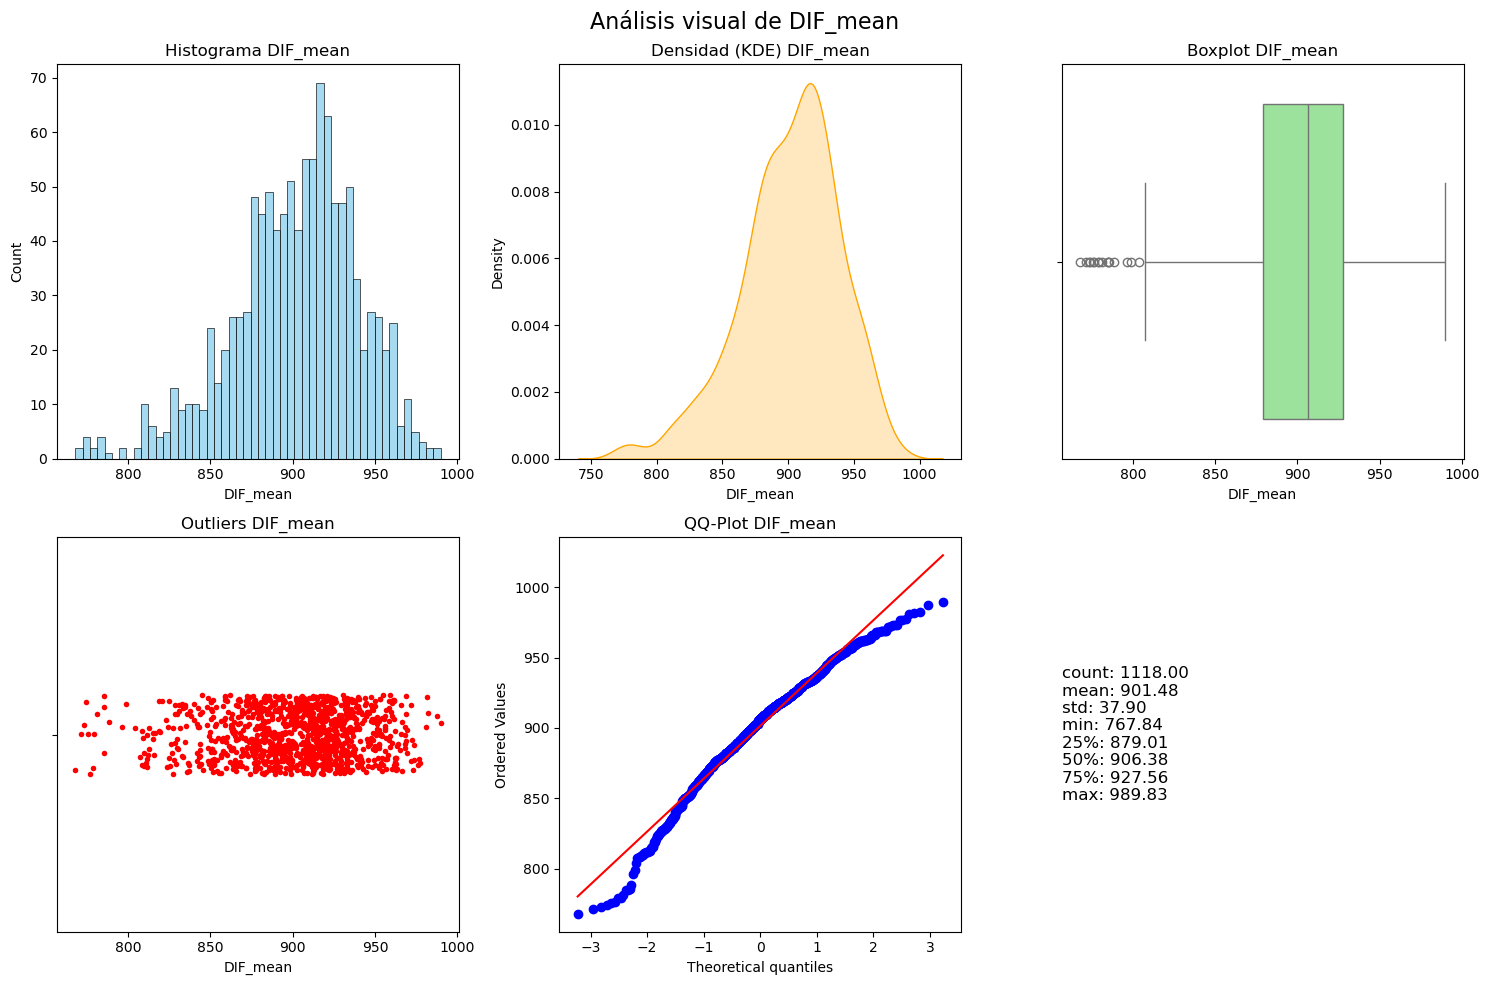

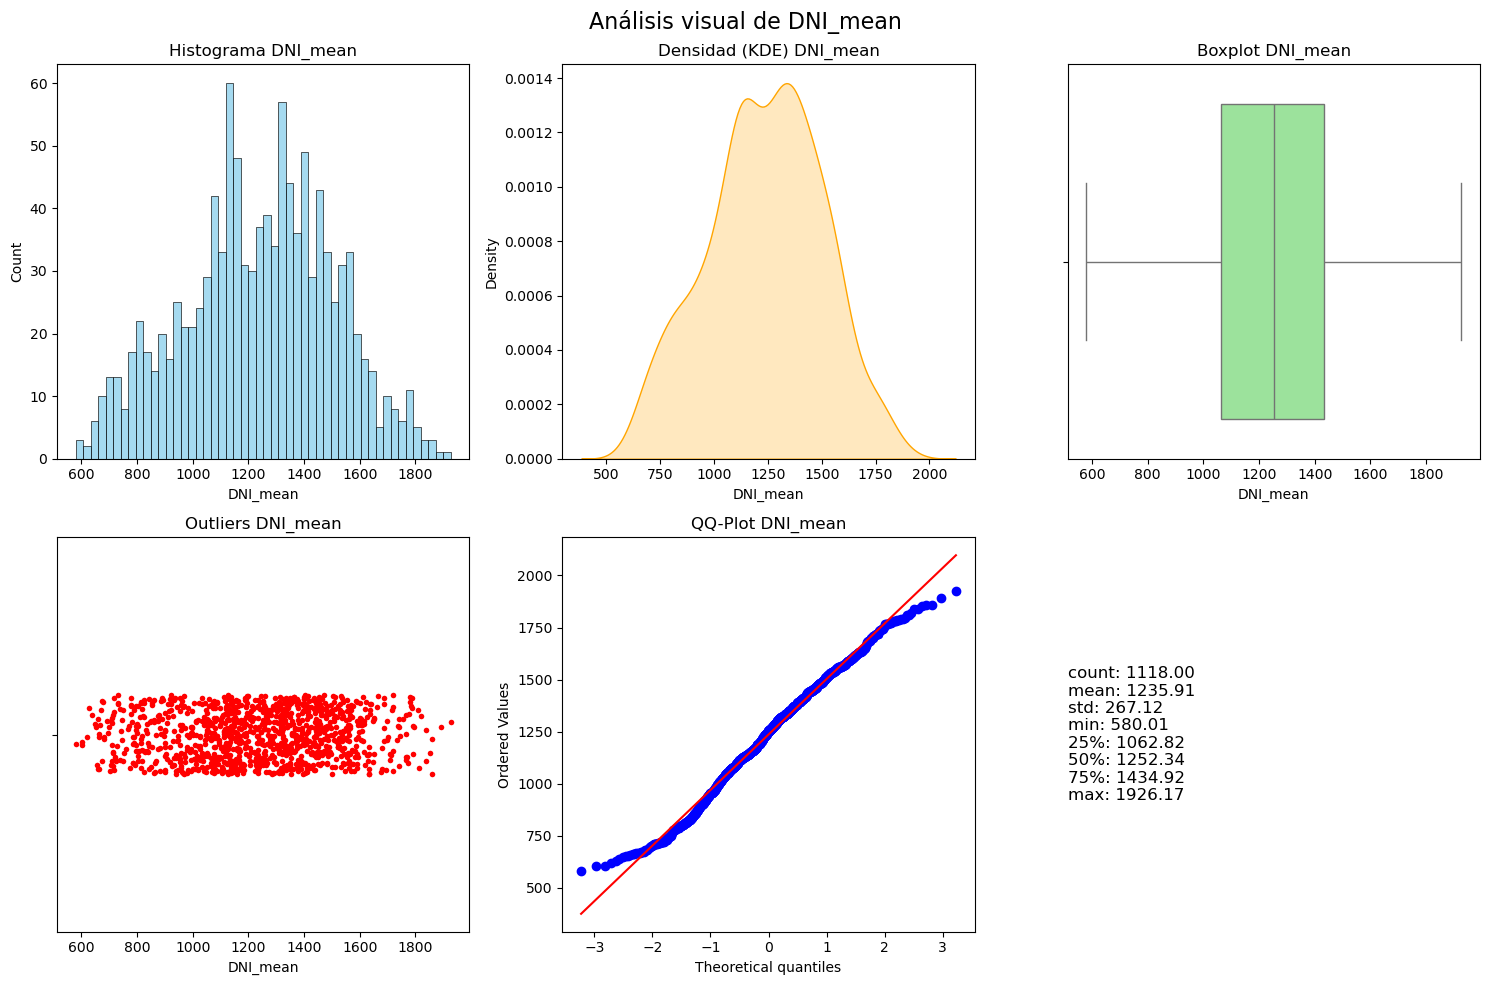

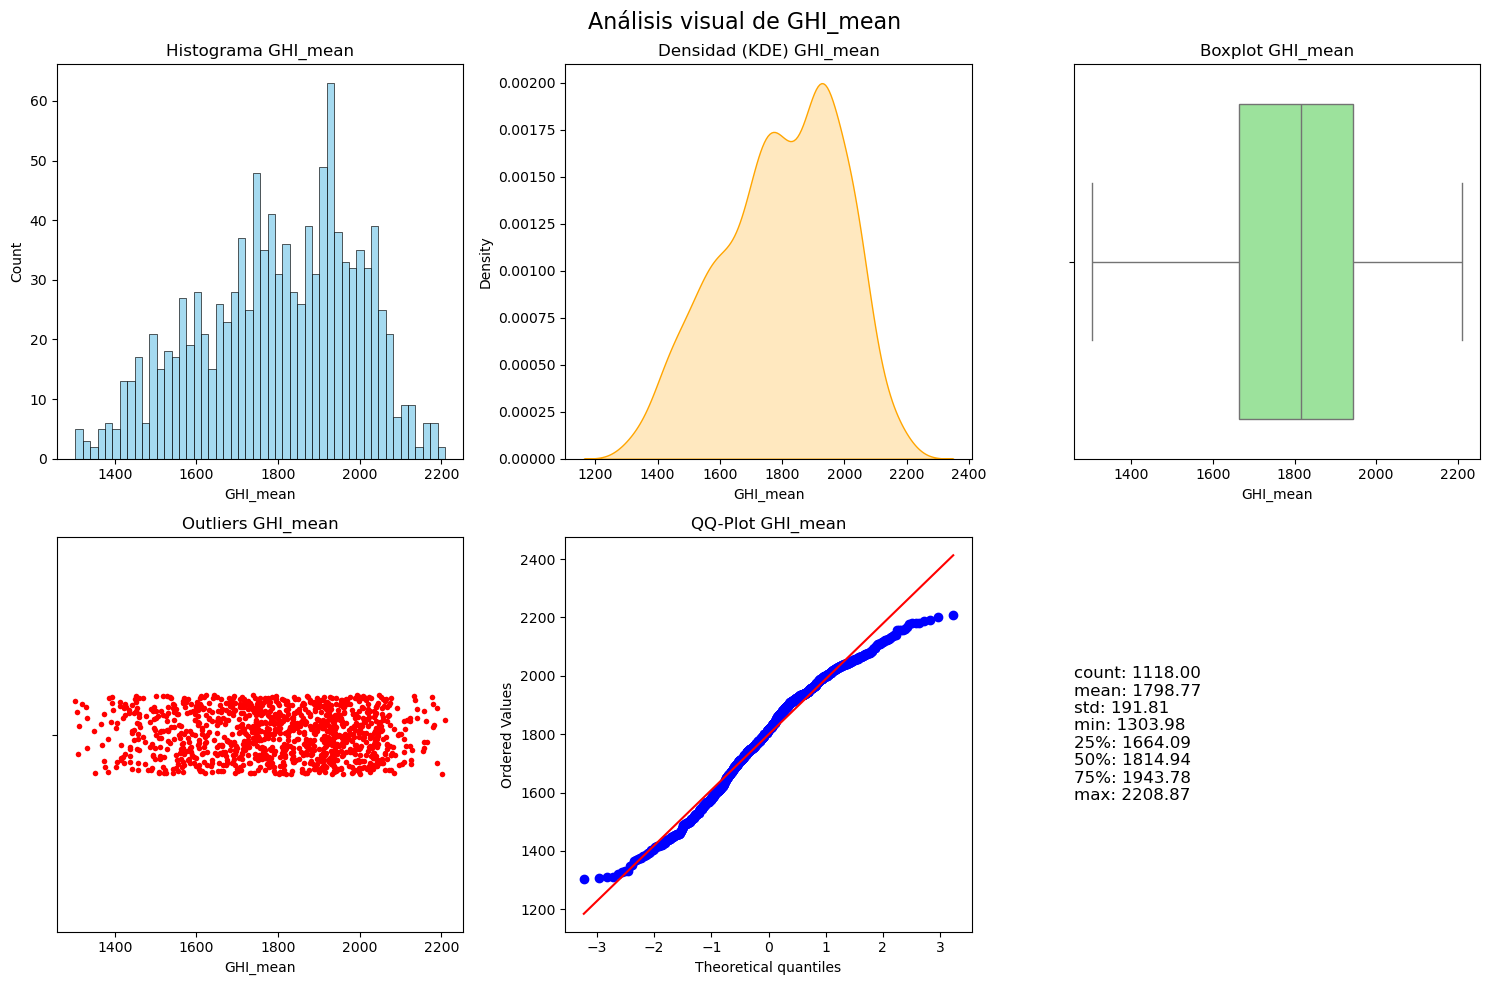

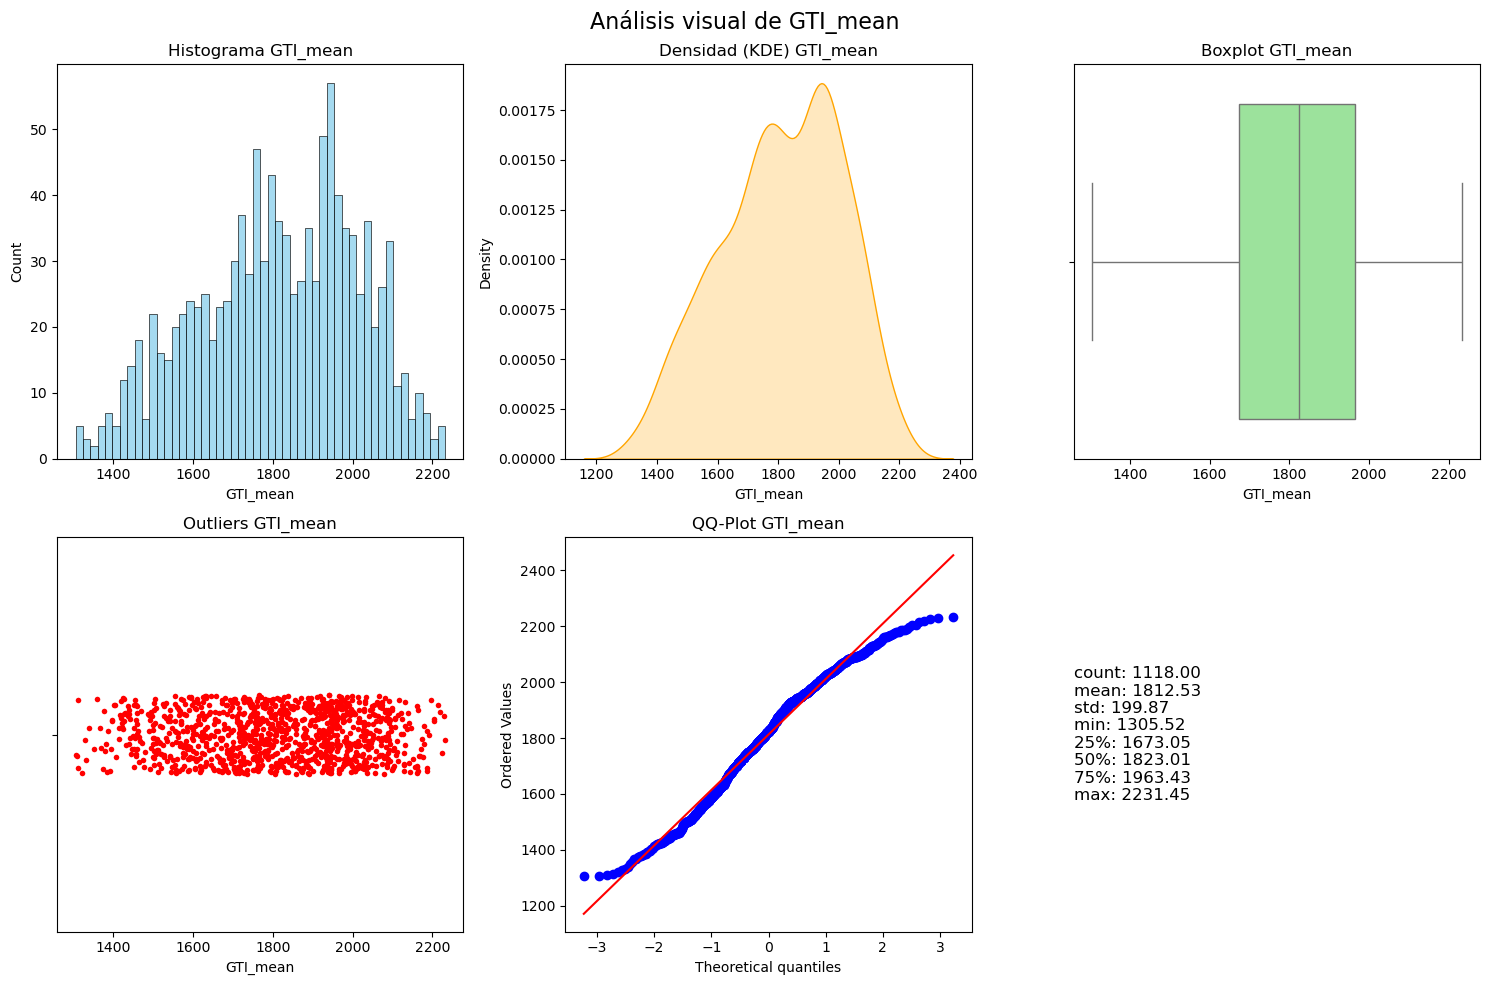

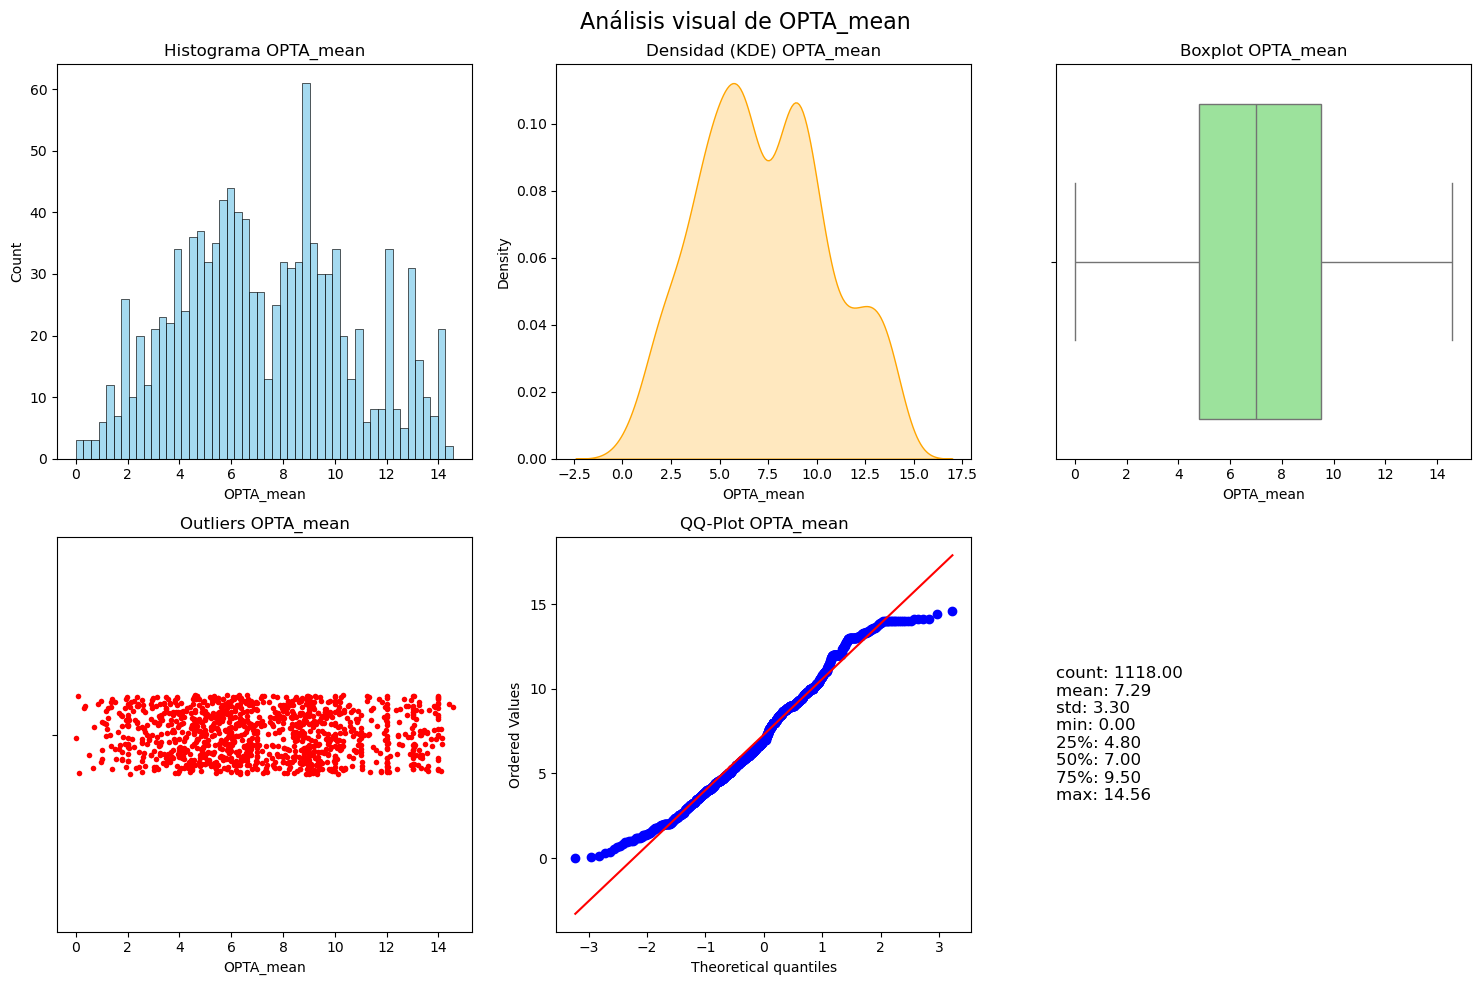

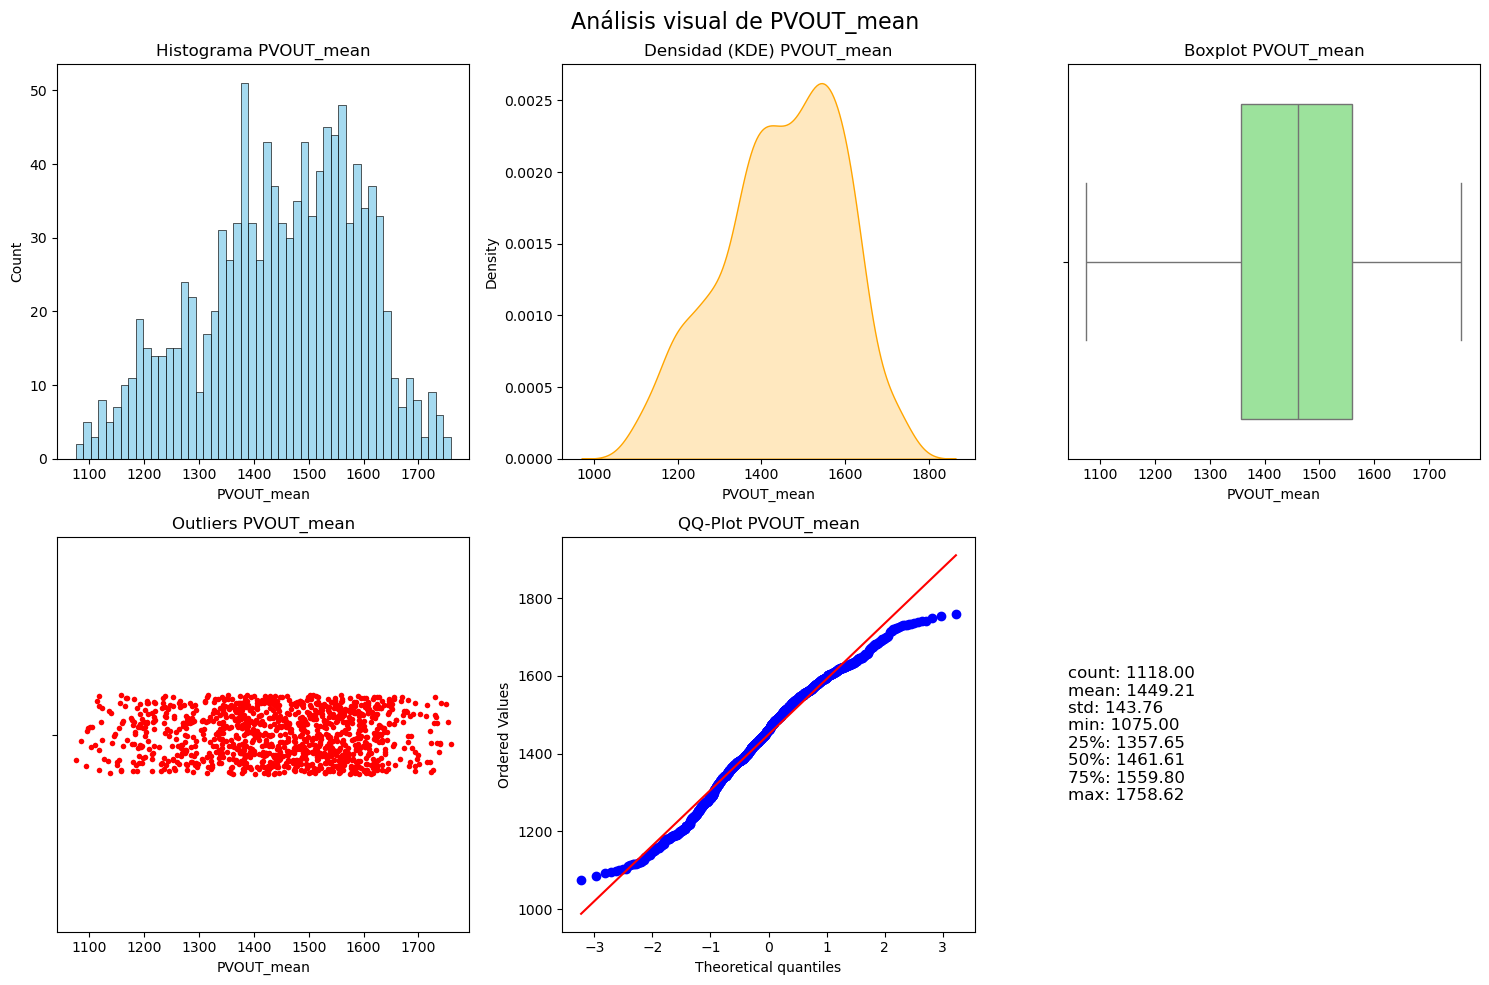

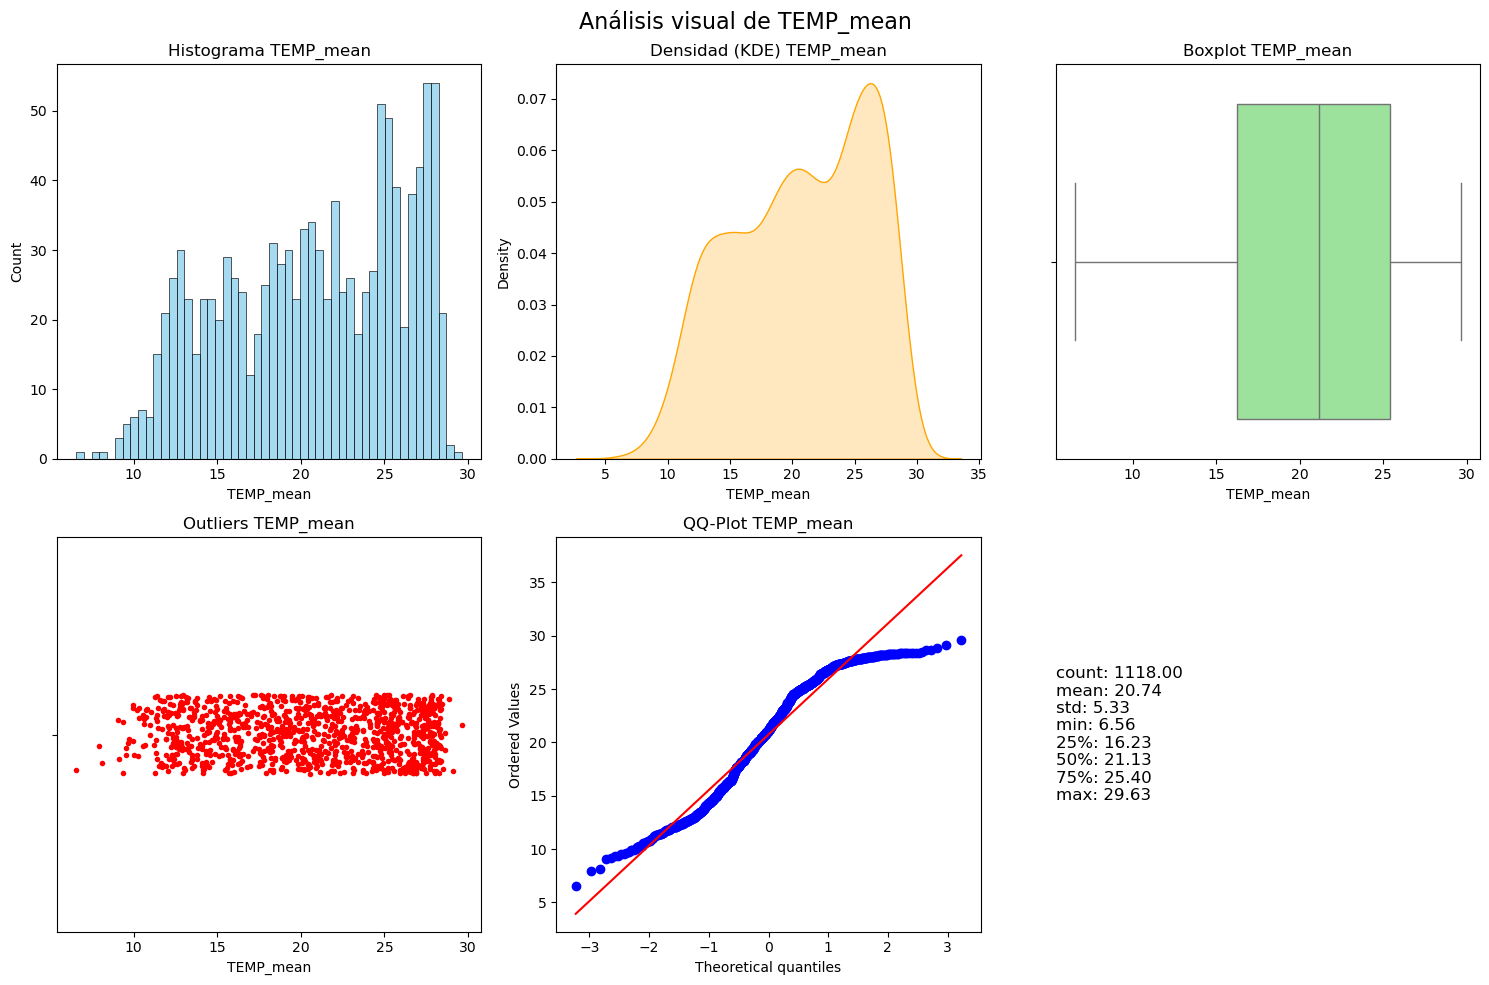

In [331]:
variables = ['DIF_mean', 'DNI_mean', 'GHI_mean', 'GTI_mean',
             'OPTA_mean', 'PVOUT_mean', 'TEMP_mean']

for var in variables:
    graficos_variable(df, var)


# 📊 Análisis Exploratorio de Datos: Potencial de Energía Solar en Colombia,
## 🎯 Objetivo,
    Analizar el potencial de energía solar fotovoltaica en los municipios de Colombia utilizando datos de irradiación solar, temperatura y producción estimada de energía.
## 📈 Variables principales:
    - DIF: Irradiación difusa (kWh/m²),
    - DNI: Irradiación normal directa (kWh/m²) ,
    - PVOUT: Producción fotovoltaica estimada (kWh/m²),
    - TEMP: Temperatura (°C),
    


## Configuracion inicial

In [332]:
import warnings
warnings.filterwarnings('default')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [333]:
def setup_matplotlib_for_plotting():
    """
    Configuración de matplotlib para gráficos de alta calidad
    """
    warnings.filterwarnings('default')
    plt.switch_backend("Agg")
    plt.style.use("seaborn-v0_8")
    sns.set_palette("husl")
    
    plt.rcParams["font.sans-serif"] = ["Noto Sans CJK SC", "WenQuanYi Zen Hei", "PingFang SC", "Arial Unicode MS", "Hiragino Sans GB"]
    plt.rcParams["axes.unicode_minus"] = False
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['figure.dpi'] = 100

## Carga y exploración inicial de datos

In [334]:

print(f"📊 Dataset cargado: {df.shape[0]} municipios, {df.shape[1]} variables")
print(f"🗺️ Departamentos únicos: {df['Departamento'].nunique()}")

# Mostrar primeras filas
# En un notebook, 'display(df.head())' mostraría la tabla.
print("\n[Mostrar df.head() en entorno interactivo]")
display(df.head()) 


📊 Dataset cargado: 1118 municipios, 46 variables
🗺️ Departamentos únicos: 33

[Mostrar df.head() en entorno interactivo]


Departamento               Municipio       lat        lon     DIF_min  \
0      CAQUETA               FLORENCIA  1.749139 -75.558237  802.818970   
1      CAQUETA                 ALBANIA  1.227875 -75.882333  918.604004   
2      CAQUETA  BELEN DE LOS ANDAQUIES  1.500935 -75.875653  822.543030   
3      CAQUETA             EL DONCELLO  1.791381 -75.193941  815.603027   
4      CAQUETA               EL PAUJIL  1.617748 -75.234042  803.549988   

      DIF_max    DIF_mean  DIF_count    DIF_std  DIF_median  ...   PVOUT_mean  \
0  958.051025  909.802163      33098  13.177103  912.393982  ...  1267.520987   
1  928.466003  923.025512       5370   1.862814  922.622009  ...  1395.313789   
2  951.841980  915.903580      15474  13.474749  918.968994  ...  1291.264843   
3  945.267029  907.085480      14366  16.761201  913.125000  ...  1336.953101   
4  936.866028  910.789359      16051  15.457376  916.411987  ...  1355.611419   

   PVOUT_count   PVOUT_std  PVOUT_median  TEMP_min  TEMP_max  TEMP_mean  \
0         2978   99.337954   1262.303955       8.2      25.4  20.056479   
1          485    5.980074   1395.985962      23.6      25.1  24.457527   
2         1398  103.444745   1320.014038      10.0      25.0  20.928040   
3         1298  122.206388   1413.151978       7.8      25.6  21.758011   
4         1445  119.271516   1415.343994       7.7      25.6  22.417579   

   TEMP_count  TEMP_std  TEMP_median  
0        2978  4.179916    20.700001  
1         485  0.362935    24.500000  
2        1398  3.178867    21.799999  
3        1298  4.399175    24.600000  
4        1445  4.670324    25.100000  

[5 rows x 46 columns]

In [335]:

# Información del dataset
print("\n📋 Información del dataset:")
df.info()



📋 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  1118 non-null   object 
 1   Municipio     1118 non-null   object 
 2   lat           1118 non-null   float64
 3   lon           1118 non-null   float64
 4   DIF_min       1118 non-null   float64
 5   DIF_max       1118 non-null   float64
 6   DIF_mean      1118 non-null   float64
 7   DIF_count     1118 non-null   int64  
 8   DIF_std       1118 non-null   float64
 9   DIF_median    1118 non-null   float64
 10  DNI_min       1118 non-null   float64
 11  DNI_max       1118 non-null   float64
 12  DNI_mean      1118 non-null   float64
 13  DNI_count     1118 non-null   int64  
 14  DNI_std       1118 non-null   float64
 15  DNI_median    1118 non-null   float64
 16  GHI_min       1118 non-null   float64
 17  GHI_max       1118 non-null   float64
 18  

## PREPARACIÓN DE DATOS


In [336]:
# Usaremos una expresión más robusta para asegurar que los nombres de departamento se mantengan.
df['Departamento_Clean'] = df['Departamento'].str.replace(r'AREA # \d+', '', regex=True).str.strip()

# Variables principales de análisis
variables_energia = ['DIF_mean', 'DNI_mean', 'PVOUT_mean', 'TEMP_mean']
variables_variabilidad = ['DIF_std', 'DNI_std', 'PVOUT_std', 'TEMP_std']

# Crear coordenadas ficticias para los municipios 
n_municipios = len(df)


print("✅ Datos preparados para análisis")
print(f"📍 Coordenadas generadas para {n_municipios} municipios")

✅ Datos preparados para análisis
📍 Coordenadas generadas para 1118 municipios


## ANÁLISIS EXPLORATORIO DE DATOS

In [337]:
df

Departamento               Municipio       lat        lon     DIF_min  \
0          CAQUETA               FLORENCIA  1.749139 -75.558237  802.818970   
1          CAQUETA                 ALBANIA  1.227875 -75.882333  918.604004   
2          CAQUETA  BELEN DE LOS ANDAQUIES  1.500935 -75.875653  822.543030   
3          CAQUETA             EL DONCELLO  1.791381 -75.193941  815.603027   
4          CAQUETA               EL PAUJIL  1.617748 -75.234042  803.549988   
...            ...                     ...       ...        ...         ...   
1113  CUNDINAMARCA              FUSAGASUGA  4.323540 -74.388584  762.642029   
1114  CUNDINAMARCA    SAN JUAN DE RIO SECO  4.841096 -74.658499  837.518005   
1115        TOLIMA                   HONDA  5.179419 -74.783032  874.408020   
1116     ANTIOQUIA                SABANETA  6.138325 -75.608803  906.916016   
1117     ANTIOQUIA             LA ESTRELLA  6.137589 -75.648941  901.072021   

         DIF_max    DIF_mean  DIF_count    DIF_std  DIF_median  ...  \
0     958.051025  909.802163      33098  13.177103  912.393982  ...   
1     928.466003  923.025512       5370   1.862814  922.622009  ...   
2     951.841980  915.903580      15474  13.474749  918.968994  ...   
3     945.267029  907.085480      14366  16.761201  913.125000  ...   
4     936.866028  910.789359      16051  15.457376  916.411987  ...   
...          ...         ...        ...        ...         ...  ...   
1113  953.302002  929.391227       2519  24.501736  937.596985  ...   
1114  963.164001  932.363348       4098  11.773004  931.752991  ...   
1115  937.231995  918.366851       3973   8.984192  920.065002  ...   
1116  948.919983  926.497757        209   6.118261  925.908997  ...   
1117  972.296021  933.611756        479  10.400316  935.039978  ...   

      PVOUT_count   PVOUT_std  PVOUT_median   TEMP_min   TEMP_max  TEMP_mean  \
0            2978   99.337954   1262.303955   8.200000  25.400000  20.056479   
1             485    5.980074   1395.985962  23.600000  25.100000  24.457527   
2            1398  103.444745   1320.014038  10.000000  25.000000  20.928040   
3            1298  122.206388   1413.151978   7.800000  25.600000  21.758011   
4            1445  119.271516   1415.343994   7.700000  25.600000  22.417579   
...           ...         ...           ...        ...        ...        ...   
1113          227  137.676686   1308.691040  15.300000  28.299999  23.106609   
1114          371   79.777684   1442.371948  17.700001  27.100000  23.767657   
1115          361   10.131719   1601.987061  22.100000  26.400000  24.539612   
1116           17   30.861511   1480.723999  16.900000  20.700001  19.300000   
1117           44   24.632115   1456.616943  13.300000  20.400000  17.725001   

      TEMP_count  TEMP_std  TEMP_median  Departamento_Clean  
0           2978  4.179916    20.700001             CAQUETA  
1            485  0.362935    24.500000             CAQUETA  
2           1398  3.178867    21.799999             CAQUETA  
3           1298  4.399175    24.600000             CAQUETA  
4           1445  4.670324    25.100000             CAQUETA  
...          ...       ...          ...                 ...  
1113         227  2.403485    23.500000        CUNDINAMARCA  
1114         371  2.339392    24.400000        CUNDINAMARCA  
1115         361  0.811796    24.600000              TOLIMA  
1116          17  1.176235    19.600000           ANTIOQUIA  
1117          44  1.938031    18.299999           ANTIOQUIA  

[1118 rows x 47 columns]

In [338]:
# Estadísticas descriptivas
print("\n📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES PRINCIPALES")
print("=" * 60)
display(df[variables_energia].describe().round(2))

# Top 10 municipios con mayor potencial FV
print("\n🏆 TOP 10 MUNICIPIOS - MAYOR POTENCIAL FOTOVOLTAICO")
print("=" * 60)
top_pvout = df.nlargest(10, 'PVOUT_mean')[['Municipio', 'Departamento_Clean', 'PVOUT_mean']]
display(top_pvout)

# Departamentos con mejor promedio
print("\n🗺️ RANKING DE DEPARTAMENTOS - POTENCIAL FOTOVOLTAICO PROMEDIO")
print("=" * 60)
dept_ranking = df.groupby('Departamento_Clean')['PVOUT_mean'].agg(['mean', 'count']).sort_values('mean', ascending=False).round(2)
dept_ranking.columns = ['PVOUT_Promedio', 'Num_Municipios']
display(dept_ranking.head(15))


📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES PRINCIPALES


DIF_mean  DNI_mean  PVOUT_mean  TEMP_mean
count   1118.00   1118.00     1118.00    1118.00
mean     901.48   1235.91     1449.21      20.74
std       37.90    267.12      143.76       5.33
min      767.84    580.01     1075.00       6.56
25%      879.01   1062.82     1357.65      16.23
50%      906.38   1252.34     1461.61      21.13
75%      927.56   1434.92     1559.80      25.40
max      989.83   1926.17     1758.62      29.63


🏆 TOP 10 MUNICIPIOS - MAYOR POTENCIAL FOTOVOLTAICO


Municipio Departamento_Clean   PVOUT_mean
1047              GUAPOTA          SANTANDER  1758.619531
1028   PALMAS DEL SOCORRO          SANTANDER  1754.468207
980            CAPITANEJO          SANTANDER  1749.536301
975             BARICHARA          SANTANDER  1741.559589
997   SAN JOSE DE MIRANDA          SANTANDER  1739.934659
565                URIBIA         LA GUAJIRA  1739.382766
994            SAN BENITO          SANTANDER  1737.224185
673            COVARACHIA             BOYACA  1733.884454
978               CABRERA          SANTANDER  1733.392228
1046            GUADALUPE          SANTANDER  1731.261628


🗺️ RANKING DE DEPARTAMENTOS - POTENCIAL FOTOVOLTAICO PROMEDIO


PVOUT_Promedio  Num_Municipios
Departamento_Clean                                                     
SAN ANDRES PROVIDENCIA Y SANTA CATALINA         1652.93               2
LA GUAJIRA                                      1624.03              15
ATLANTICO                                       1622.68              23
MAGDALENA                                       1616.36              30
CESAR                                           1577.30              25
BOLIVAR                                         1573.89              45
SANTANDER                                       1557.29              87
SUCRE                                           1542.42              26
ANTIOQUIA                                       1502.99             125
VICHADA                                         1497.38               4
CALDAS                                          1488.83              27
CORDOBA                                         1482.81              28
BOYACA                                          1468.02             123
TOLIMA                                          1453.75              47
ARAUCA                                          1448.21               7

## ANÁLISIS DE DISTRIBUCIONES

📊 Análisis de distribuciones completado


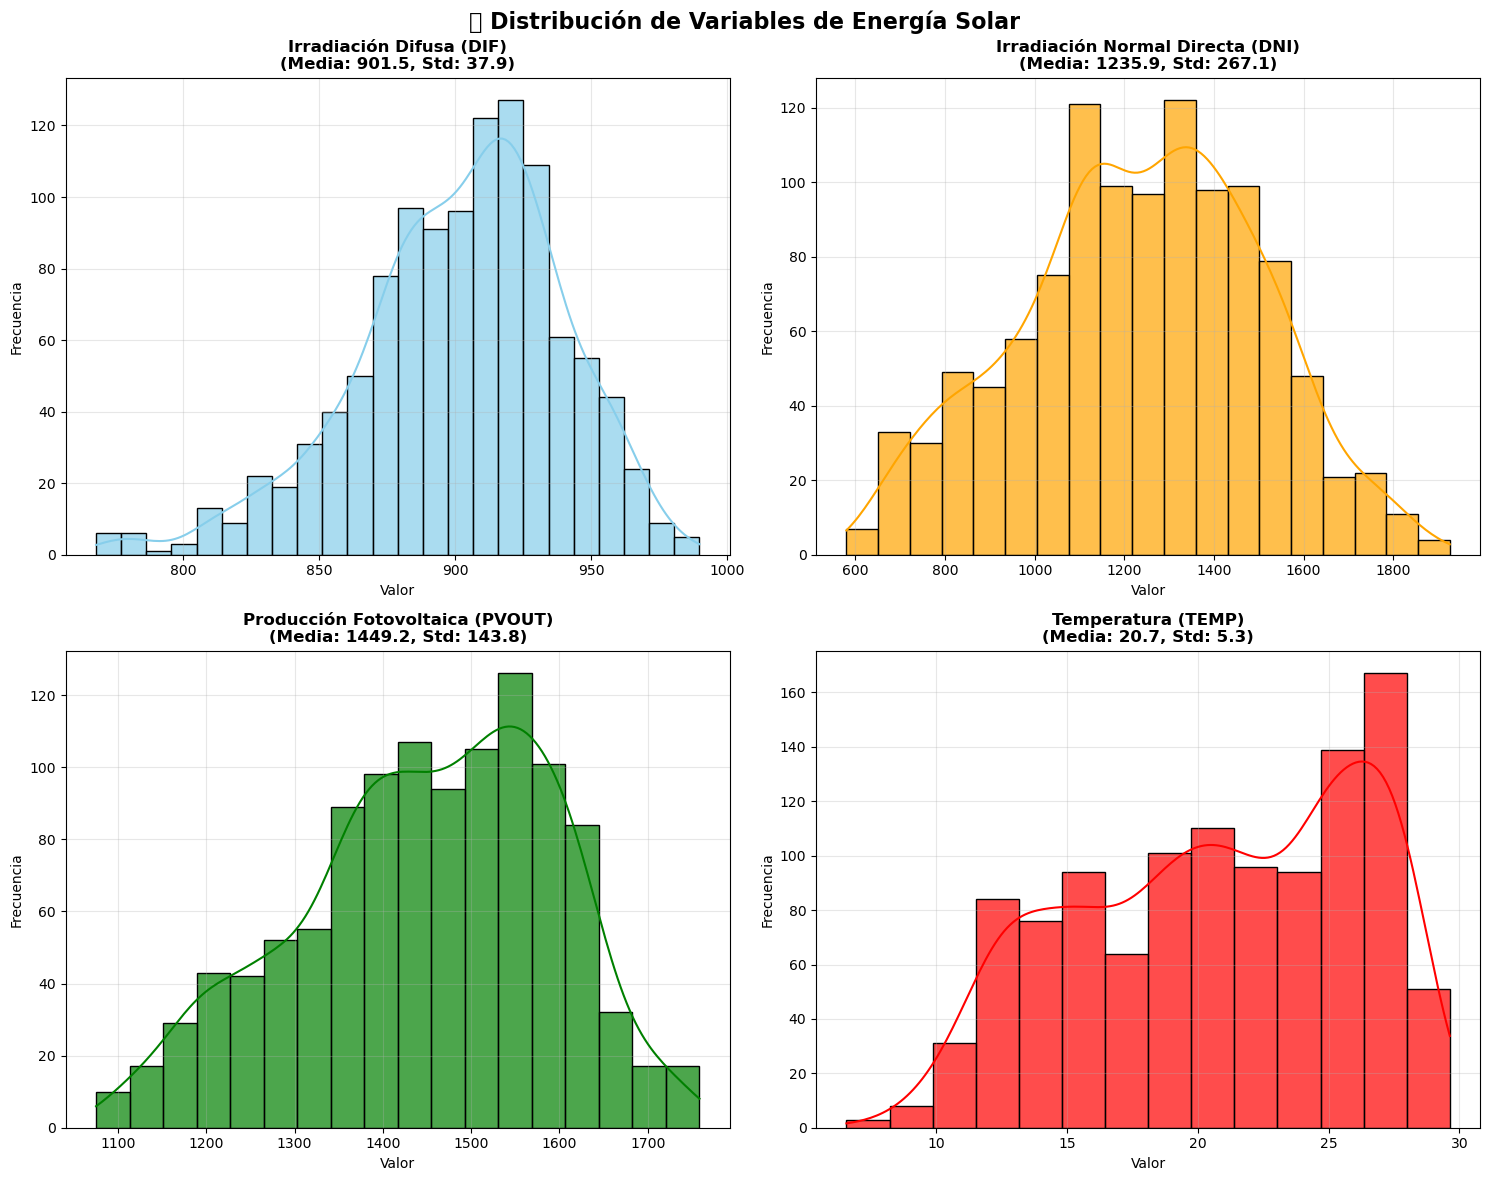

In [339]:

# GRÁFICOS DE DISTRIBUCIÓN
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Distribución de Variables de Energía Solar', fontsize=16, fontweight='bold')

variables = ['DIF_mean', 'DNI_mean', 'PVOUT_mean', 'TEMP_mean']
titles = ['Irradiación Difusa (DIF)', 'Irradiación Normal Directa (DNI)', 
          'Producción Fotovoltaica (PVOUT)', 'Temperatura (TEMP)']
colors = ['skyblue', 'orange', 'green', 'red']

for i, (var, title, color) in enumerate(zip(variables, titles, colors)):
    row, col = i // 2, i % 2
    
    # Histograma con KDE
    sns.histplot(data=df, x=var, kde=True, ax=axes[row, col], color=color, alpha=0.7)
    axes[row, col].set_title(f'{title}\n(Media: {df[var].mean():.1f}, Std: {df[var].std():.1f})', 
                            fontweight='bold')
    axes[row, col].set_xlabel('Valor')
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
# plt.show() # Descomentar para ver el gráfico en un entorno interactivo

print("📊 Análisis de distribuciones completado")

## ANÁLISIS DE CORRELACIONES


🔗 Análisis de correlaciones completado


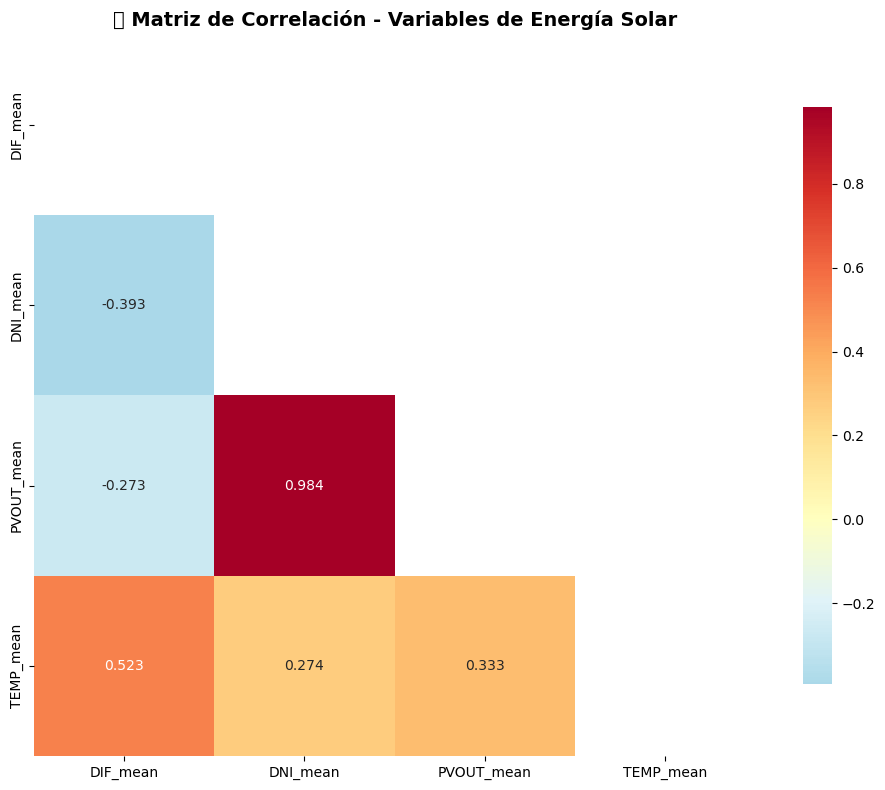

In [340]:
# MATRIZ DE CORRELACIÓN
# Calcular correlaciones
corr_matrix = df[variables_energia].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('🔗 Matriz de Correlación - Variables de Energía Solar', fontsize=14, fontweight='bold')
plt.tight_layout()
# plt.show() # Descomentar para ver el gráfico en un entorno interactivo

# Scatterplot matrix (Plotly)
fig = px.scatter_matrix(df, dimensions=variables_energia, 
                       title="📊 Matriz de Dispersión - Variables de Energía Solar",
                       color='PVOUT_mean',
                       color_continuous_scale='Viridis')
fig.update_layout(height=800, width=800)
# fig.show() # Descomentar para ver el gráfico interactivo

print("🔗 Análisis de correlaciones completado")

## MAPAS INTERACTIVOS - VISUALIZACIÓN GEOGRÁFICA (Folium)

In [341]:
import matplotlib as mpl

In [342]:
# MAPA 1: POTENCIAL FOTOVOLTAICO
def crear_mapa_potencial_fv():
    """
    Crear mapa de potencial fotovoltaico con círculos proporcionales
    """
    # Crear mapa base centrado en Colombia
    m = folium.Map(
        location=[4.5, -74.0],  # Bogotá como centro
        zoom_start=6,
        tiles='OpenStreetMap'
    )
    
    # Normalizar valores para el tamaño de los círculos
    scaler = MinMaxScaler(feature_range=(5, 30))
    df['circle_size'] = scaler.fit_transform(df[['PVOUT_mean']])
    
    # Crear gradiente de colores (usando Matplotlib)
    colormap = plt.cm.RdYlGn # plt.cm is fine
    norm = mpl.colors.Normalize(vmin=df['PVOUT_mean'].min(), vmax=df['PVOUT_mean'].max()) # Use mpl.colors.Normalize
    
    # Agregar círculos para cada municipio
    for idx, row in df.iterrows():
        # Use mpl.colors.rgb2hex
        color = mpl.colors.rgb2hex(colormap(norm(row['PVOUT_mean'])))
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=row['circle_size'],
            popup=f"""<b>{row['Municipio']}</b><br>
                      Departamento: {row['Departamento']}<br>
                      PVOUT: {row['PVOUT_mean']:.2f} kWh/m²<br>
                      DNI: {row['DNI_mean']:.2f} kWh/m²<br>
                      Temperatura: {row['TEMP_mean']:.1f}°C""",
            color='black',
            weight=1,
            fillColor=color,
            fillOpacity=0.7
        ).add_to(m)
    
    # Agregar leyenda (HTML)
    legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 200px; height: 200px; 
                background-color: white; border:2px solid grey; z-index:9999; 
                font-size:14px; padding: 10px">
    <h4>🔋 Potencial Fotovoltaico</h4>
    <p><span style="color:red;">●</span> Bajo (< 1200 kWh/m²)</p>
    <p><span style="color:yellow;">●</span> Medio (1200-1400 kWh/m²)</p>
    <p><span style="color:green;">●</span> Alto (> 1400 kWh/m²)</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    
    return m

# Crear y mostrar mapa
mapa_potencial = crear_mapa_potencial_fv()
mapa_potencial.save('mapa_potencial_fotovoltaico.html')
print("🗺️ Mapa de potencial fotovoltaico creado: mapa_potencial_fotovoltaico.html")
mapa_potencial # Descomentar para mostrar el mapa en un notebook


🗺️ Mapa de potencial fotovoltaico creado: mapa_potencial_fotovoltaico.html


In [343]:

# MAPA 2: MAPA DE CALOR
def crear_mapa_calor():
    """
    Crear mapa de calor de irradiación solar
    """
    # Crear mapa base
    m = folium.Map(
        location=[4.5, -74.0],
        zoom_start=6,
        tiles='CartoDB positron'
    )
    
    # Preparar datos para mapa de calor
    heat_data = [[row['lat'], row['lon'], row['DNI_mean']] for idx, row in df.iterrows()]
    
    # Agregar mapa de calor
    HeatMap(heat_data, 
            min_opacity=0.3,
            max_zoom=18,
            radius=25,
            blur=15,
            gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1.0: 'red'}).add_to(m)
    
    # Agregar título
    title_html = '''
                 <h3 align="center" style="font-size:20px"><b>🌡️ Mapa de Calor - Irradiación Normal Directa (DNI)</b></h3>
                 '''
    m.get_root().html.add_child(folium.Element(title_html))
    
    return m

# Crear y mostrar mapa de calor
mapa_calor = crear_mapa_calor()
mapa_calor.save('mapa_calor_dni.html')
print("🌡️ Mapa de calor creado: mapa_calor_dni.html")
mapa_calor # Descomentar para mostrar el mapa en un notebook


🌡️ Mapa de calor creado: mapa_calor_dni.html


In [344]:


# MAPA 3: CLUSTERING DE MUNICIPIOS
def crear_mapa_clusters():
    """
    Crear mapa con clustering de municipios por características energéticas
    """
    # Realizar clustering K-means
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(df[variables_energia])
    
    kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto') # n_init='auto' para evitar warnings en versiones recientes
    df['cluster'] = kmeans.fit_predict(features_scaled)
    
    # Crear mapa base
    m = folium.Map(
        location=[4.5, -74.0],
        zoom_start=6,
        tiles='OpenStreetMap'
    )
    
    # Colores para clusters
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    cluster_names = ['Bajo Potencial', 'Potencial Moderado', 'Buen Potencial', 
                    'Muy Buen Potencial', 'Excelente Potencial']
    
    # Agregar marcadores por cluster
    for cluster_id in range(5):
        cluster_data = df[df['cluster'] == cluster_id]
        
        for idx, row in cluster_data.iterrows():
            folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=8,
                popup=f"""<b>{row['Municipio']}</b><br>
                         Cluster: {cluster_names[cluster_id]}<br>
                         PVOUT: {row['PVOUT_mean']:.2f} kWh/m²<br>
                         DNI: {row['DNI_mean']:.2f} kWh/m²<br>
                         Temp: {row['TEMP_mean']:.1f}°C""",
                color='black',
                weight=1,
                fillColor=colors[cluster_id],
                fillOpacity=0.7
            ).add_to(m)
    
    # Crear leyenda de clusters
    legend_html = '''
    <div style="position: fixed; 
                top: 10px; right: 10px; width: 250px; height: 180px; 
                background-color: white; border:2px solid grey; z-index:9999; 
                font-size:14px; padding: 10px">
    <h4>🎯 Clusters de Potencial Energético</h4>
    <p><span style="color:red;">●</span> Bajo Potencial</p>
    <p><span style="color:blue;">●</span> Potencial Moderado</p>
    <p><span style="color:green;">●</span> Buen Potencial</p>
    <p><span style="color:purple;">●</span> Muy Buen Potencial</p>
    <p><span style="color:orange;">●</span> Excelente Potencial</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    
    return m, df

# Crear mapa de clusters
mapa_clusters, df_with_clusters = crear_mapa_clusters()
mapa_clusters.save('mapa_clusters_potencial.html')
print("🎯 Mapa de clusters creado: mapa_clusters_potencial.html")

# Mostrar estadísticas de clusters
print("\n📊 ESTADÍSTICAS POR CLUSTER")
cluster_stats = df_with_clusters.groupby('cluster')[variables_energia].mean().round(2)
cluster_stats.index = ['Bajo', 'Moderado', 'Bueno', 'Muy Bueno', 'Excelente']
display(cluster_stats)

mapa_clusters # Descomentar para mostrar el mapa en un notebook


🎯 Mapa de clusters creado: mapa_clusters_potencial.html

📊 ESTADÍSTICAS POR CLUSTER


DIF_mean  DNI_mean  PVOUT_mean  TEMP_mean
Bajo         933.07    823.84     1229.30      22.29
Moderado     930.12   1197.32     1445.28      22.84
Bueno        881.08   1024.01     1320.82      13.99
Muy Bueno    847.31   1537.75     1593.88      17.02
Excelente    904.59   1473.86     1579.87      25.93

In [345]:

# MAPA 4: ANÁLISIS POR DEPARTAMENTO
def crear_mapa_departamentos():
    """
    Crear mapa con marcadores agrupados por departamento
    """
    # Crear mapa base
    m = folium.Map(
        location=[4.5, -74.0],
        zoom_start=6,
        tiles='OpenStreetMap'
    )
    
    # Calcular promedios por departamento
    dept_stats = df.groupby('Departamento_Clean').agg({
        'PVOUT_mean': ['mean', 'count'],
        'lat': 'mean',
        'lon': 'mean'
    }).round(2)
    
    dept_stats.columns = ['PVOUT_avg', 'municipios_count', 'lat_center', 'lon_center']
    dept_stats = dept_stats.reset_index()
    
    # Crear marker cluster
    marker_cluster = MarkerCluster().add_to(m)
    
    # Agregar marcadores por municipio
    for idx, row in df.iterrows():
        # Determinar color basado en PVOUT
        if row['PVOUT_mean'] > 1400:
            color = 'green'
            icon = 'star'
        elif row['PVOUT_mean'] > 1200:
            color = 'orange'  
            icon = 'flash'
        else:
            color = 'red'
            icon = 'minus'
        
        folium.Marker(
            location=[row['lat'], row['lon']],
            popup=f"""<b>{row['Municipio']}</b><br>
                     📍 {row['Departamento_Clean']}<br>
                     ⚡ PVOUT: {row['PVOUT_mean']:.2f} kWh/m²<br>
                     ☀️ DNI: {row['DNI_mean']:.2f} kWh/m²<br>
                     🌡️ Temp: {row['TEMP_mean']:.1f}°C""",
            icon=folium.Icon(color=color, icon=icon, prefix='fa')
        ).add_to(marker_cluster)
    
    return m

# Crear mapa por departamentos
mapa_departamentos = crear_mapa_departamentos()
mapa_departamentos.save('mapa_departamentos_clustered.html')
print("📍 Mapa por departamentos creado: mapa_departamentos_clustered.html")
mapa_departamentos # Descomentar para mostrar el mapa en un notebook

📍 Mapa por departamentos creado: mapa_departamentos_clustered.html


## GRÁFICO 3D INTERACTIVO


In [346]:
# Gráfico 3D de correlación DNI vs TEMP vs PVOUT
fig = go.Figure(data=[go.Scatter3d(
    x=df['DNI_mean'],
    y=df['TEMP_mean'],
    z=df['PVOUT_mean'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['PVOUT_mean'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="PVOUT (kWh/m²)")
    ),
    text=df['Municipio'],
    hovertemplate="<b>%{text}</b><br>" +
                  "DNI: %{x:.2f} kWh/m²<br>" +
                  "Temperatura: %{y:.1f}°C<br>" +
                  "PVOUT: %{z:.2f} kWh/m²<br>" +
                  "<extra></extra>"
)])

fig.update_layout(
    title='🌐 Relación 3D: DNI vs Temperatura vs Producción Fotovoltaica',
    scene=dict(
        xaxis_title='Irradiación Normal Directa (DNI)',
        yaxis_title='Temperatura (°C)',
        zaxis_title='Producción Fotovoltaica (PVOUT)'
    ),
    width=900,
    height=700
)

fig.show() # Descomentar para ver el gráfico interactivo
print("🌐 Gráfico 3D interactivo creado")


🌐 Gráfico 3D interactivo creado


In [347]:

# GRÁFICO SUNBURST
# Crear categorías de potencial
df['categoria_potencial'] = pd.cut(df['PVOUT_mean'], 
                                  bins=[0, 800, 1200, 1500, float('inf')],
                                  labels=['Bajo', 'Medio', 'Alto', 'Excelente'])

# Preparar datos para sunburst
sunburst_data = df.groupby(['Departamento_Clean', 'categoria_potencial']).size().reset_index(name='count')
sunburst_data = sunburst_data[sunburst_data['count'] > 0]

# Crear gráfico sunburst
fig = px.sunburst(
    sunburst_data,
    path=['Departamento_Clean', 'categoria_potencial'],
    values='count',
    title='☀️ Distribución de Potencial Fotovoltaico por Departamento',
    color='count',
    color_continuous_scale='RdYlGn'
)

fig.update_layout(font_size=12, width=800, height=700)
fig.show() # Descomentar para ver el gráfico interactivo
print("☀️ Gráfico sunburst creado")


☀️ Gráfico sunburst creado


## ANÁLISIS COMPARATIVO


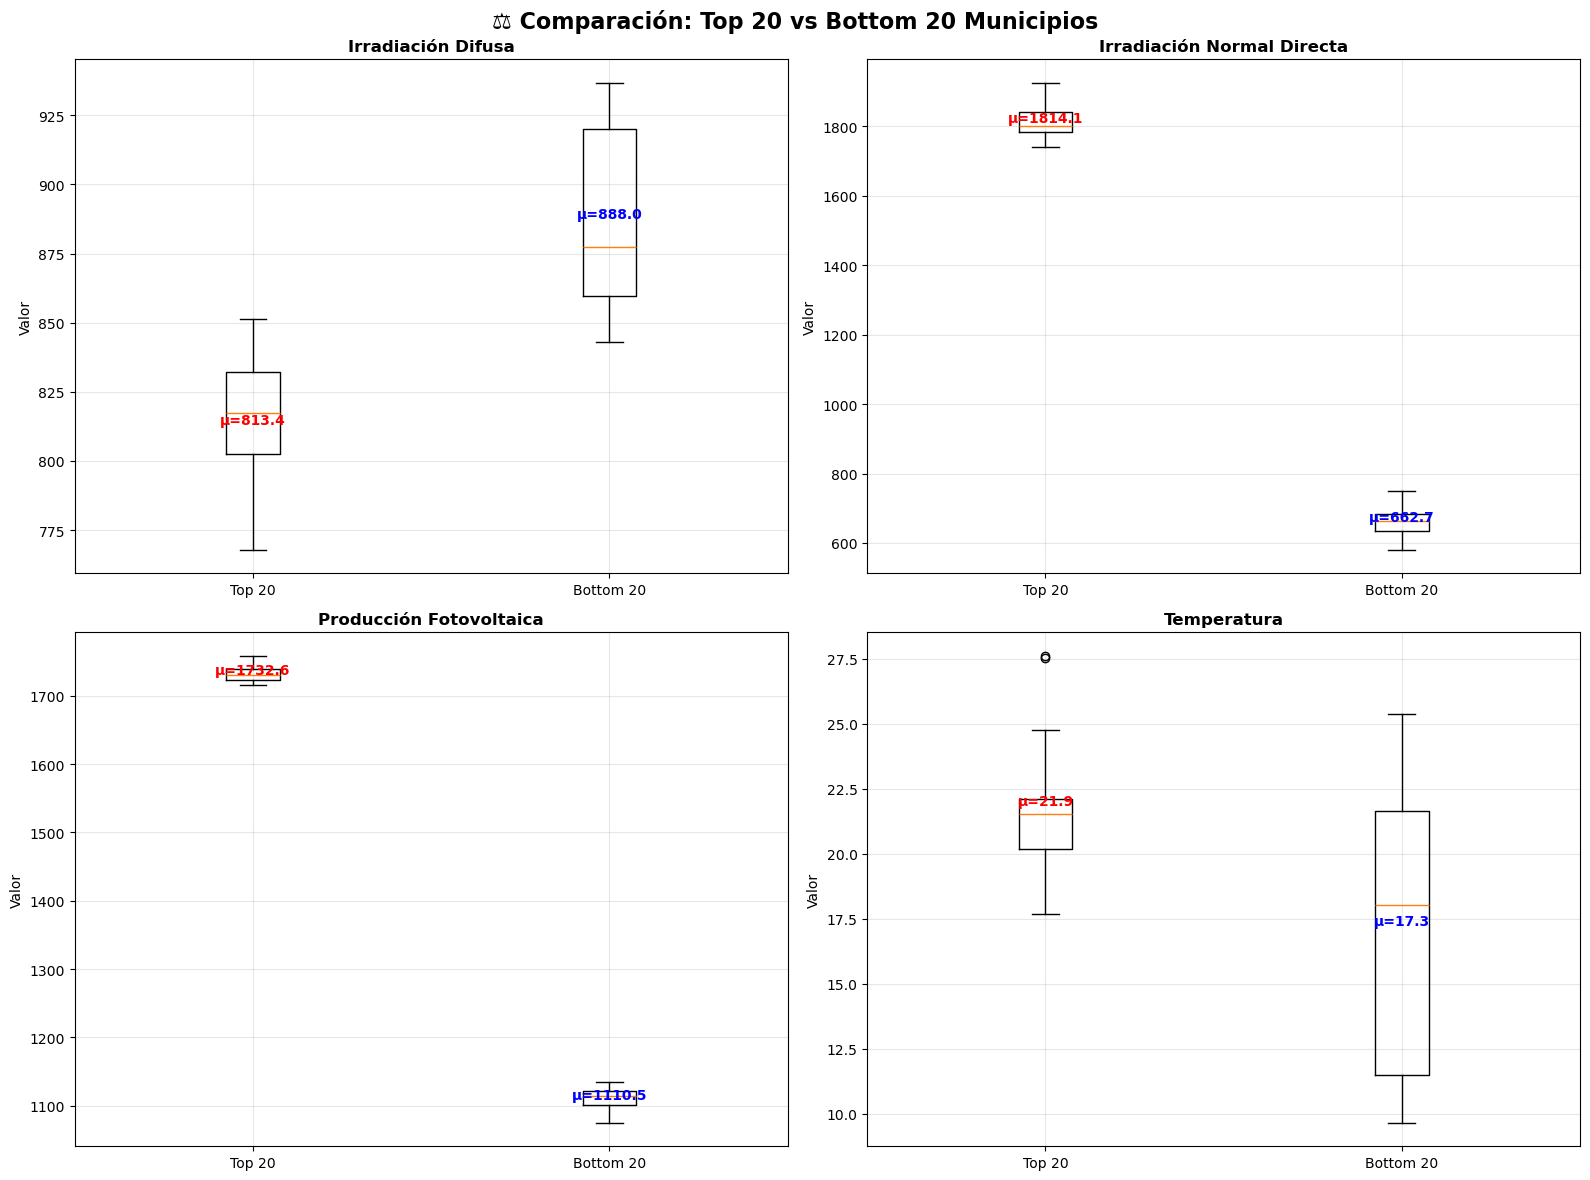

⚖️ Análisis comparativo completado


In [349]:
# COMPARACIÓN TOP vs BOTTOM
# Seleccionar top 20 y bottom 20
top_20 = df.nlargest(20, 'PVOUT_mean')
bottom_20 = df.nsmallest(20, 'PVOUT_mean')

# Crear comparación visual
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('⚖️ Comparación: Top 20 vs Bottom 20 Municipios', fontsize=16, fontweight='bold')

variables_comp = ['DIF_mean', 'DNI_mean', 'PVOUT_mean', 'TEMP_mean']
titles_comp = ['Irradiación Difusa', 'Irradiación Normal Directa', 'Producción Fotovoltaica', 'Temperatura']

for i, (var, title) in enumerate(zip(variables_comp, titles_comp)):
    row, col = i // 2, i % 2
    
    # Box plot comparativo
    data_comp = [top_20[var], bottom_20[var]]
    axes[row, col].boxplot(data_comp, labels=['Top 20', 'Bottom 20'])
    axes[row, col].set_title(f'{title}', fontweight='bold')
    axes[row, col].set_ylabel('Valor')
    axes[row, col].grid(True, alpha=0.3)
    
    # Agregar medias
    mean_top = top_20[var].mean()
    mean_bottom = bottom_20[var].mean()
    axes[row, col].text(1, mean_top, f'μ={mean_top:.1f}', ha='center', fontweight='bold', color='red')
    axes[row, col].text(2, mean_bottom, f'μ={mean_bottom:.1f}', ha='center', fontweight='bold', color='blue')

plt.tight_layout()
plt.show() # Descomentar para ver el gráfico en un entorno interactivo

print("⚖️ Análisis comparativo completado")


## ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

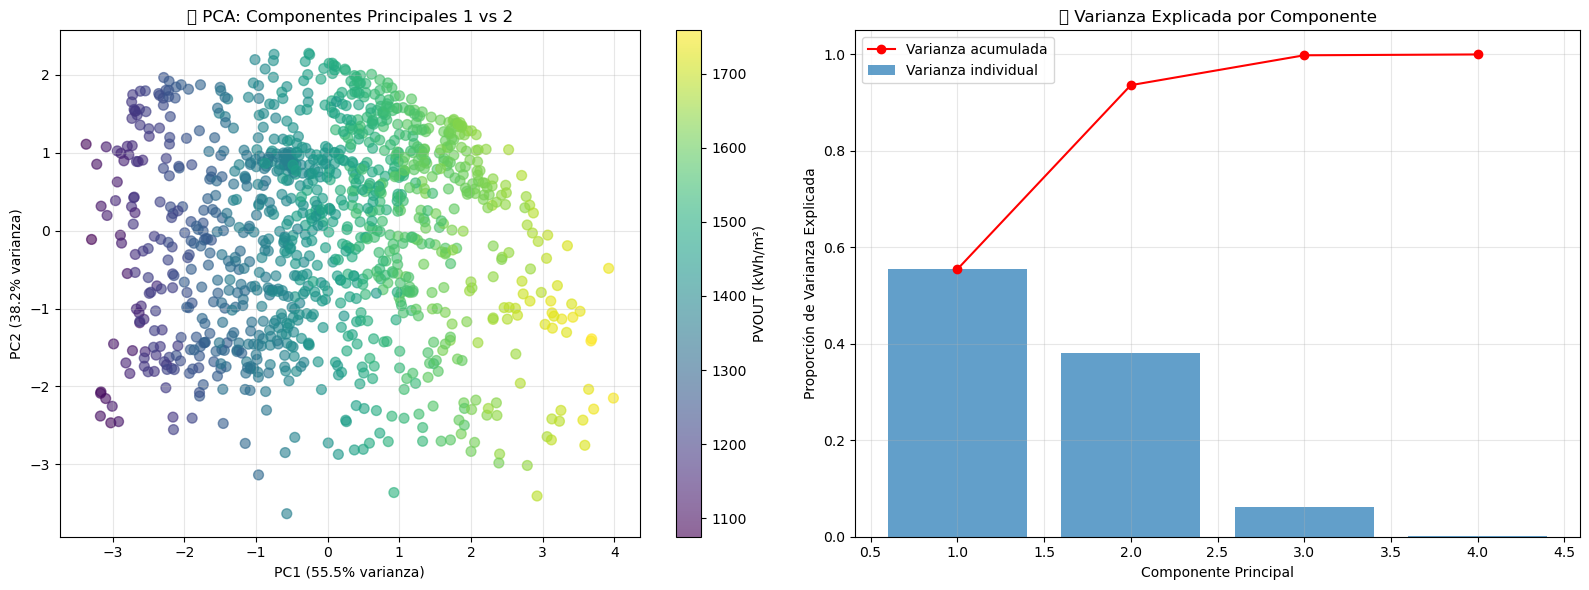

In [350]:
# ANÁLISIS PCA
# Preparar datos para PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[variables_energia])

# Aplicar PCA
pca = PCA()
pca_features = pca.fit_transform(features_scaled)

# Crear DataFrame con componentes principales
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Municipio'] = df['Municipio'].values
pca_df['PVOUT_mean'] = df['PVOUT_mean'].values

# Visualizar PCA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatterplot PC1 vs PC2
scatter = axes[0].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['PVOUT_mean'], 
                         cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
axes[0].set_title('🔍 PCA: Componentes Principales 1 vs 2')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='PVOUT (kWh/m²)')

# Gráfico de varianza explicada
var_exp = pca.explained_variance_ratio_
var_exp_cum = np.cumsum(var_exp)

axes[1].bar(range(1, len(var_exp) + 1), var_exp, alpha=0.7, label='Varianza individual')
axes[1].plot(range(1, len(var_exp_cum) + 1), var_exp_cum, 'ro-', label='Varianza acumulada')
axes[1].set_xlabel('Componente Principal')
axes[1].set_ylabel('Proporción de Varianza Explicada')
axes[1].set_title('📊 Varianza Explicada por Componente')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show() # Descomentar para ver el gráfico en un entorno interactivo


In [351]:

# Mostrar componentes
print("\n🔍 COMPONENTES PRINCIPALES - CARGAS")
print("=" * 50)
components_df = pd.DataFrame(
    pca.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=variables_energia
)
display(components_df.round(3))

print(f"\n📊 Varianza explicada total (PC1 + PC2): {var_exp_cum[1]:.1%}")



🔍 COMPONENTES PRINCIPALES - CARGAS


PC1    PC2
DIF_mean   -0.271  0.691
DNI_mean    0.668 -0.016
PVOUT_mean  0.659  0.067
TEMP_mean   0.214  0.720


📊 Varianza explicada total (PC1 + PC2): 93.6%


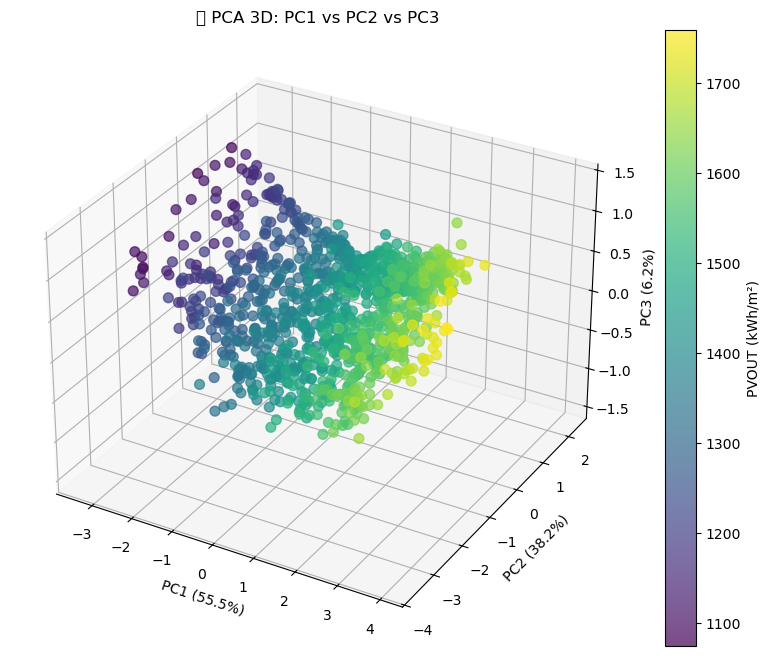

In [353]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=pca_df['PVOUT_mean'], cmap='viridis', s=50, alpha=0.7
)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})')
ax.set_title('🌐 PCA 3D: PC1 vs PC2 vs PC3')

plt.colorbar(p, label='PVOUT (kWh/m²)')
plt.show()
